In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Step 1: Load the dataset
file_path = '/content/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [4]:
# Step 2: Data Exploration and Cleaning
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Step 3: Descriptive Statistics
# Calculate key metrics
average_spending = data['Annual Income (k$)'].mean()
average_age = data['Age'].mean()
purchase_frequency = data['Spending Score (1-100)'].mean()

In [7]:
print(f"Average Annual Income: {average_spending}")

Average Annual Income: 60.56


In [8]:
print(f"Average Age: {average_age}")

Average Age: 38.85


In [9]:
print(f"Average Spending Score: {purchase_frequency}")


Average Spending Score: 50.2


In [10]:
# Step 4: Customer Segmentation using K-means
# Selecting features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


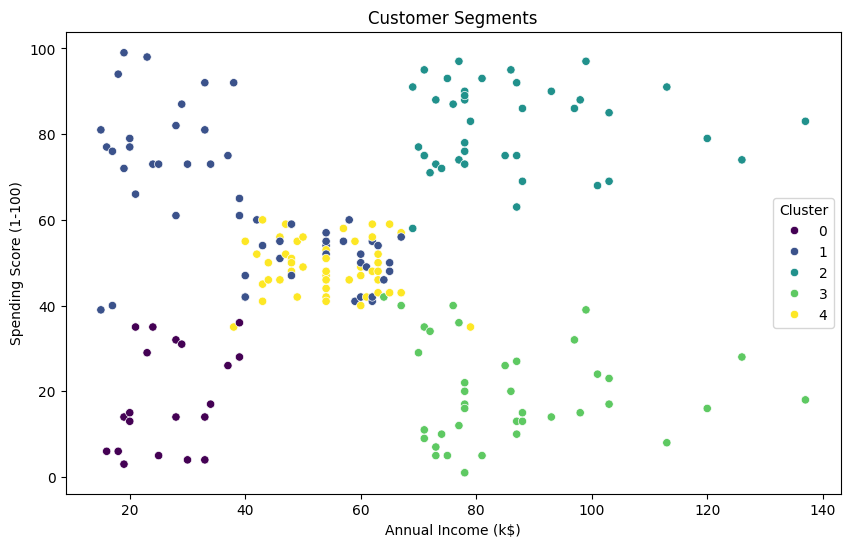

In [13]:
# Step 5: Visualization
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

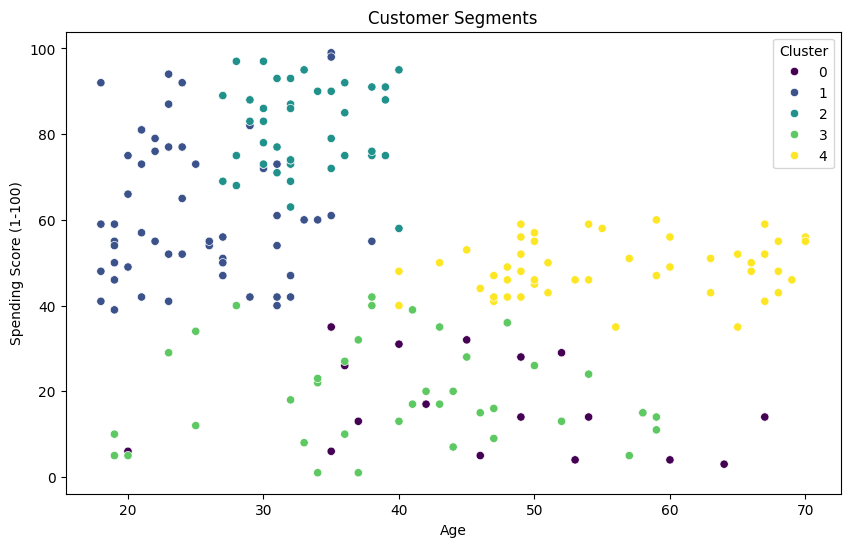

In [14]:
# Visualizing Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [17]:
# Step 6: Insights and Recommendations
# Analyzing the characteristics of each segment
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


In [18]:
# Recommendations based on cluster analysis
for cluster in cluster_summary.index:
    print(f"Cluster {cluster}:")

Cluster 0:
Cluster 1:
Cluster 2:
Cluster 3:
Cluster 4:


In [19]:
print(f"Average Age: {cluster_summary.loc[cluster, 'Age']}")

Average Age: 55.638297872340424


In [20]:
print(f"Average Annual Income: {cluster_summary.loc[cluster, 'Annual Income (k$)']}")

Average Annual Income: 54.38297872340426


In [21]:
print(f"Average Spending Score: {cluster_summary.loc[cluster, 'Spending Score (1-100)']}")


Average Spending Score: 48.851063829787236


In [22]:
#Thank You